In [1]:
import pandas as pd
import numpy as np
from scipy import stats as st
import matplotlib.pyplot as plt
import math as mt


calls=pd.read_csv('/datasets/megaline_calls.csv')
internet=pd.read_csv('/datasets/megaline_internet.csv')
messages=pd.read_csv('/datasets/megaline_messages.csv')
plans=pd.read_csv('/datasets/megaline_plans.csv')
users=pd.read_csv('/datasets/megaline_users.csv')

Primeiramente comecei analisando e fazendo algumas correções nos dados da tabela calls que mostram as chamadas dos usuários no ano de 2018.

In [2]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype  
---  ------     --------------   -----  
 0   id         137735 non-null  object 
 1   user_id    137735 non-null  int64  
 2   call_date  137735 non-null  object 
 3   duration   137735 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 4.2+ MB


In [3]:
calls.head(15)

,id,user_id,call_date,duration
0,1000_93,1000,2018-12-27,8.52
1,1000_145,1000,2018-12-27,13.66
2,1000_247,1000,2018-12-27,14.48
3,1000_309,1000,2018-12-28,5.76
4,1000_380,1000,2018-12-30,4.22
5,1000_388,1000,2018-12-31,2.20
6,1000_510,1000,2018-12-27,5.75
7,1000_521,1000,2018-12-28,14.18
8,1000_530,1000,2018-12-28,5.77
9,1000_544,1000,2018-12-26,4.40


In [4]:
calls.describe()

,user_id,duration
count,137735.000000,137735.000000
mean,1247.658046,6.745927
std,139.416268,5.839241
min,1000.000000,0.000000
25%,1128.000000,1.290000
50%,1247.000000,5.980000
75%,1365.000000,10.690000
max,1499.000000,37.600000


Converti a coluna call_date no formato correto de datas

In [5]:
calls['call_date']=pd.to_datetime(calls['call_date'],format='%Y-%m-%d')

In [6]:
calls.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 137735 entries, 0 to 137734
Data columns (total 4 columns):
 #   Column     Non-Null Count   Dtype         
---  ------     --------------   -----         
 0   id         137735 non-null  object        
 1   user_id    137735 non-null  int64         
 2   call_date  137735 non-null  datetime64[ns]
 3   duration   137735 non-null  float64       
dtypes: datetime64[ns](1), float64(1), int64(1), object(1)
memory usage: 4.2+ MB


In [7]:
calls.query('duration == 0')['duration'].count()/calls['duration'].count()

0.1948233927469416

Descobri que 19,48% das chamadas possuem duração 0 (provavelmente foram chamadas perdidas). Também adicionei uma coluna com o mês que foi realizada a chamada. Essa coluna será importante para futuras análises. 

In [8]:
calls['call_date_month']=calls['call_date'].dt.month

In [9]:
calls['call_date_month'].value_counts()

12    30614
11    24651
10    21064
9     16523
8     13590
7     11105
6      8221
5      5959
4      3442
3      1620
2       774
1       172
Name: call_date_month, dtype: int64

In [10]:
calls['duration_round'] = calls['duration'].apply(np.ceil)

Conforme foi explicado a Megaline arredonda a duração das chamadas para cima. Fiz as modificações necessárias para isso.

In [11]:
calls_true = calls.query('duration != 0')

Resolvi filtrar a tabela retirando as chamadas com duração 0, pois não irão fazer diferença no estudo. Abaixo analisei como ficou as características da tabela filtrada. 

In [12]:
calls_true.head(20)

,id,user_id,call_date,duration,call_date_month,duration_round
0,1000_93,1000,2018-12-27,8.52,12,9.0
1,1000_145,1000,2018-12-27,13.66,12,14.0
2,1000_247,1000,2018-12-27,14.48,12,15.0
3,1000_309,1000,2018-12-28,5.76,12,6.0
4,1000_380,1000,2018-12-30,4.22,12,5.0
5,1000_388,1000,2018-12-31,2.20,12,3.0
6,1000_510,1000,2018-12-27,5.75,12,6.0
7,1000_521,1000,2018-12-28,14.18,12,15.0
8,1000_530,1000,2018-12-28,5.77,12,6.0
9,1000_544,1000,2018-12-26,4.40,12,5.0


In [13]:
calls_true.describe()


,user_id,duration,call_date_month,duration_round
count,110901.000000,110901.000000,110901.000000,110901.000000
mean,1247.511871,8.378196,9.319231,8.875907
std,139.475249,5.354567,2.415025,5.355181
min,1000.000000,0.010000,1.000000,1.000000
25%,1127.000000,4.150000,8.000000,5.000000
50%,1247.000000,7.710000,10.000000,8.000000
75%,1365.000000,11.820000,11.000000,12.000000
max,1499.000000,37.600000,12.000000,38.000000


In [14]:
calls_true.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110901 entries, 0 to 137734
Data columns (total 6 columns):
 #   Column           Non-Null Count   Dtype         
---  ------           --------------   -----         
 0   id               110901 non-null  object        
 1   user_id          110901 non-null  int64         
 2   call_date        110901 non-null  datetime64[ns]
 3   duration         110901 non-null  float64       
 4   call_date_month  110901 non-null  int64         
 5   duration_round   110901 non-null  float64       
dtypes: datetime64[ns](1), float64(2), int64(2), object(1)
memory usage: 5.9+ MB


Aqui criei uma tabela dinâmica agregando as durações das chamadas em cada mês e para cada usuário.  

In [15]:
calls_duration_month1 = calls_true.pivot_table(index=['user_id','call_date_month'], values='duration_round',aggfunc='sum').reset_index() 
calls_duration_month1.columns = ['user_id','month','calls_duration']
calls_duration_month1

,user_id,month,calls_duration
0,1000,12,124.0
1,1001,8,182.0
2,1001,9,315.0
3,1001,10,393.0
4,1001,11,426.0
...,...,...,...
2251,1498,12,339.0
2252,1499,9,346.0
2253,1499,10,385.0
2254,1499,11,308.0


Nessa tabela dinâmica contei o número de chamadas que cada usuário fez em cada mês.  

In [16]:
calls_count_month1 = calls_true.pivot_table(index=['user_id','call_date_month'], values='duration_round',aggfunc='count').reset_index()
calls_count_month1.columns = ['user_id','month','calls_count']
calls_count_month1

,user_id,month,calls_count
0,1000,12,16
1,1001,8,22
2,1001,9,38
3,1001,10,47
4,1001,11,49
...,...,...,...
2251,1498,12,32
2252,1499,9,35
2253,1499,10,41
2254,1499,11,39


Analise dos dados de Internet. Comcei tendo uma visão geral da tabela internet.

In [17]:
internet.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 104825 entries, 0 to 104824
Data columns (total 4 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            104825 non-null  object 
 1   user_id       104825 non-null  int64  
 2   session_date  104825 non-null  object 
 3   mb_used       104825 non-null  float64
dtypes: float64(1), int64(1), object(2)
memory usage: 3.2+ MB


In [18]:
internet.head(15)

,id,user_id,session_date,mb_used
0,1000_13,1000,2018-12-29,89.86
1,1000_204,1000,2018-12-31,0.00
2,1000_379,1000,2018-12-28,660.40
3,1000_413,1000,2018-12-26,270.99
4,1000_442,1000,2018-12-27,880.22
5,1001_0,1001,2018-08-24,284.68
6,1001_3,1001,2018-12-09,656.04
7,1001_4,1001,2018-11-04,16.97
8,1001_10,1001,2018-11-27,135.18
9,1001_15,1001,2018-12-13,761.92


In [19]:
internet.describe()

,user_id,mb_used
count,104825.000000,104825.000000
mean,1242.496361,366.713701
std,142.053913,277.170542
min,1000.000000,0.000000
25%,1122.000000,136.080000
50%,1236.000000,343.980000
75%,1367.000000,554.610000
max,1499.000000,1693.470000


Realizei mesmo procedimento da tabela calls. Convertendo para o tipo correto e adicionando coluna com mês.  

In [20]:
internet['session_date']=pd.to_datetime(internet['session_date'],format='%Y-%m-%d')

In [21]:
internet['internet_date_month']=internet['session_date'].dt.month

In [22]:
internet

,id,user_id,session_date,mb_used,internet_date_month
0,1000_13,1000,2018-12-29,89.86,12
1,1000_204,1000,2018-12-31,0.00,12
2,1000_379,1000,2018-12-28,660.40,12
3,1000_413,1000,2018-12-26,270.99,12
4,1000_442,1000,2018-12-27,880.22,12
...,...,...,...,...,...
104820,1499_215,1499,2018-10-20,218.06,10
104821,1499_216,1499,2018-12-30,304.72,12
104822,1499_217,1499,2018-09-22,292.75,9
104823,1499_218,1499,2018-12-07,0.00,12


Tabela dinâmica com dados mensais utilizados por cada usuário. 

In [23]:
internet_data_month1=internet.pivot_table(index=['user_id','internet_date_month'], values='mb_used',aggfunc='sum').reset_index()
internet_data_month1

,user_id,internet_date_month,mb_used
0,1000,12,1901.47
1,1001,8,6919.15
2,1001,9,13314.82
3,1001,10,22330.49
4,1001,11,18504.30
...,...,...,...
2272,1498,12,23137.69
2273,1499,9,12984.76
2274,1499,10,19492.43
2275,1499,11,16813.83


Nos próximos códigos arredondei os dados conforme a Megaline exige. 

In [24]:
internet_data_month1['mb_used'] = internet_data_month1['mb_used']/1024

In [25]:
internet_data_month1

,user_id,internet_date_month,mb_used
0,1000,12,1.856904
1,1001,8,6.756982
2,1001,9,13.002754
3,1001,10,21.807119
4,1001,11,18.070605
...,...,...,...
2272,1498,12,22.595400
2273,1499,9,12.680430
2274,1499,10,19.035576
2275,1499,11,16.419756


In [26]:
internet_data_month1['mb_used'] = internet_data_month1['mb_used'].apply(np.ceil)

In [27]:
internet_data_month1.columns = ['user_id','month','gb_used']
internet_data_month1

,user_id,month,gb_used
0,1000,12,2.0
1,1001,8,7.0
2,1001,9,14.0
3,1001,10,22.0
4,1001,11,19.0
...,...,...,...
2272,1498,12,23.0
2273,1499,9,13.0
2274,1499,10,20.0
2275,1499,11,17.0


Analise das mensagens 

In [28]:
messages.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 76051 entries, 0 to 76050
Data columns (total 3 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   id            76051 non-null  object
 1   user_id       76051 non-null  int64 
 2   message_date  76051 non-null  object
dtypes: int64(1), object(2)
memory usage: 1.7+ MB


In [29]:
messages.head(15)

,id,user_id,message_date
0,1000_125,1000,2018-12-27
1,1000_160,1000,2018-12-31
2,1000_223,1000,2018-12-31
3,1000_251,1000,2018-12-27
4,1000_255,1000,2018-12-26
5,1000_346,1000,2018-12-29
6,1000_386,1000,2018-12-30
7,1000_413,1000,2018-12-31
8,1000_502,1000,2018-12-27
9,1000_525,1000,2018-12-28


In [30]:
messages.describe()

,user_id
count,76051.000000
mean,1245.972768
std,139.843635
min,1000.000000
25%,1123.000000
50%,1251.000000
75%,1362.000000
max,1497.000000


Converti data e adicionei coluna do mês conforme fiz anteriormente nas outras tabelas. 

In [31]:
messages['message_date']=pd.to_datetime(messages['message_date'],format='%Y-%m-%d')

In [32]:
messages['message_date_month']=messages['message_date'].dt.month

In [33]:
messages_count_month1 = messages.pivot_table(index=['user_id','message_date_month'],  values='id',aggfunc='count').reset_index() 
messages_count_month1.columns = ['user_id','month','messages']
messages_count_month1

,user_id,month,messages
0,1000,12,11
1,1001,8,30
2,1001,9,44
3,1001,10,53
4,1001,11,36
...,...,...,...
1801,1496,9,21
1802,1496,10,18
1803,1496,11,13
1804,1496,12,11


Aqui começo a unir as tabelas com as informações de chamadas, mensagens e dados em uma só.

In [34]:
merge_calls_messages = calls_duration_month1.merge(messages_count_month1, on=['user_id','month'], how='outer')

In [35]:
merge_calls_messages

,user_id,month,calls_duration,messages
0,1000,12,124.0,11.0
1,1001,8,182.0,30.0
2,1001,9,315.0,44.0
3,1001,10,393.0,53.0
4,1001,11,426.0,36.0
...,...,...,...,...
2285,1349,11,NaN,72.0
2286,1349,12,NaN,61.0
2287,1361,5,NaN,2.0
2288,1407,11,NaN,1.0


In [36]:
merge_calls_messages_internet = merge_calls_messages.merge(internet_data_month1, on=['user_id','month'], how='outer')

In [37]:
merge_calls_messages_internet = merge_calls_messages_internet.sort_values(by=['user_id','month'])
merge_calls_messages_internet

,user_id,month,calls_duration,messages,gb_used
0,1000,12,124.0,11.0,2.0
1,1001,8,182.0,30.0,7.0
2,1001,9,315.0,44.0,14.0
3,1001,10,393.0,53.0,22.0
4,1001,11,426.0,36.0,19.0
...,...,...,...,...,...
2251,1498,12,339.0,NaN,23.0
2252,1499,9,346.0,NaN,13.0
2253,1499,10,385.0,NaN,20.0
2254,1499,11,308.0,NaN,17.0


Análise da tabela dos planos 

In [38]:
plans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   messages_included      2 non-null      int64  
 1   mb_per_month_included  2 non-null      int64  
 2   minutes_included       2 non-null      int64  
 3   usd_monthly_pay        2 non-null      int64  
 4   usd_per_gb             2 non-null      int64  
 5   usd_per_message        2 non-null      float64
 6   usd_per_minute         2 non-null      float64
 7   plan_name              2 non-null      object 
dtypes: float64(2), int64(5), object(1)
memory usage: 256.0+ bytes


In [39]:
plans.head(15)

,messages_included,mb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,plan_name
0,50,15360,500,20,10,0.03,0.03,surf
1,1000,30720,3000,70,7,0.01,0.01,ultimate


Alterei o nome da coluna dos planos para conseguir posteriormente fazer um merge com outras tabelas. Também alterei o formato dos dados incluídos em cada pacote de MB para GB. 

In [40]:
plans.columns = ['messages_included','gb_per_month_included','minutes_included','usd_monthly_pay','usd_per_gb','usd_per_message','usd_per_minute','plan']

In [41]:
plans['gb_per_month_included']= plans['gb_per_month_included']/1024

In [42]:
plans.describe()

,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
count,2.000000,2.000000,2.000000,2.000000,2.00000,2.000000,2.000000
mean,525.000000,22.500000,1750.000000,45.000000,8.50000,0.020000,0.020000
std,671.751442,10.606602,1767.766953,35.355339,2.12132,0.014142,0.014142
min,50.000000,15.000000,500.000000,20.000000,7.00000,0.010000,0.010000
25%,287.500000,18.750000,1125.000000,32.500000,7.75000,0.015000,0.015000
50%,525.000000,22.500000,1750.000000,45.000000,8.50000,0.020000,0.020000
75%,762.500000,26.250000,2375.000000,57.500000,9.25000,0.025000,0.025000
max,1000.000000,30.000000,3000.000000,70.000000,10.00000,0.030000,0.030000


Análise da tabela dos usuários 

In [43]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   user_id     500 non-null    int64 
 1   first_name  500 non-null    object
 2   last_name   500 non-null    object
 3   age         500 non-null    int64 
 4   city        500 non-null    object
 5   reg_date    500 non-null    object
 6   plan        500 non-null    object
 7   churn_date  34 non-null     object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB


In [44]:
users.head(15)

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,NaN
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,NaN
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,NaN
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,NaN
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,NaN
5,1005,Livia,Shields,31,"Dallas-Fort Worth-Arlington, TX MSA",2018-11-29,surf,NaN
6,1006,Jesusa,Bradford,73,"San Francisco-Oakland-Berkeley, CA MSA",2018-11-27,ultimate,2018-12-18
7,1007,Eusebio,Welch,42,"Grand Rapids-Kentwood, MI MSA",2018-07-11,surf,NaN
8,1008,Emely,Hoffman,53,"Orlando-Kissimmee-Sanford, FL MSA",2018-08-03,ultimate,NaN
9,1009,Gerry,Little,19,"San Jose-Sunnyvale-Santa Clara, CA MSA",2018-04-22,surf,NaN


In [45]:
users.describe()

,user_id,age
count,500.000000,500.000000
mean,1249.500000,45.486000
std,144.481833,16.972269
min,1000.000000,18.000000
25%,1124.750000,30.000000
50%,1249.500000,46.000000
75%,1374.250000,61.000000
max,1499.000000,75.000000


Alterei formato das colunas com datas para o tipo correto. Também troquei os dados nulos pela data 31/12/2018. Escolhi essa data pois como o estudo é apenas para o ano de 2018, significa que quem ainda está ativo no plano teria ele no último dia de 2018. 

In [46]:
users['reg_date']=pd.to_datetime(users['reg_date'],format='%Y-%m-%d')

In [47]:
users.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   user_id     500 non-null    int64         
 1   first_name  500 non-null    object        
 2   last_name   500 non-null    object        
 3   age         500 non-null    int64         
 4   city        500 non-null    object        
 5   reg_date    500 non-null    datetime64[ns]
 6   plan        500 non-null    object        
 7   churn_date  34 non-null     object        
dtypes: datetime64[ns](1), int64(2), object(5)
memory usage: 31.4+ KB


In [48]:
users['churn_date'] = users['churn_date'].fillna('2018-12-31')

In [49]:
users['churn_date']=pd.to_datetime(users['churn_date'],format='%Y-%m-%d')

In [50]:
users

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
0,1000,Anamaria,Bauer,45,"Atlanta-Sandy Springs-Roswell, GA MSA",2018-12-24,ultimate,2018-12-31
1,1001,Mickey,Wilkerson,28,"Seattle-Tacoma-Bellevue, WA MSA",2018-08-13,surf,2018-12-31
2,1002,Carlee,Hoffman,36,"Las Vegas-Henderson-Paradise, NV MSA",2018-10-21,surf,2018-12-31
3,1003,Reynaldo,Jenkins,52,"Tulsa, OK MSA",2018-01-28,surf,2018-12-31
4,1004,Leonila,Thompson,40,"Seattle-Tacoma-Bellevue, WA MSA",2018-05-23,surf,2018-12-31
...,...,...,...,...,...,...,...,...
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,2018-12-31
496,1496,Ariel,Shepherd,49,"New Orleans-Metairie, LA MSA",2018-02-20,surf,2018-12-31
497,1497,Donte,Barrera,49,"Los Angeles-Long Beach-Anaheim, CA MSA",2018-12-10,ultimate,2018-12-31
498,1498,Scot,Williamson,51,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-02-04,surf,2018-12-31


In [51]:
users['plan'].value_counts()

surf        339
ultimate    161
Name: plan, dtype: int64

In [52]:
users[['user_id','plan']]

,user_id,plan
0,1000,ultimate
1,1001,surf
2,1002,surf
3,1003,surf
4,1004,surf
...,...,...
495,1495,surf
496,1496,surf
497,1497,ultimate
498,1498,surf


In [53]:
merge_calls_messages_internet_plan = merge_calls_messages_internet.merge(users[['user_id','plan','city']], on=['user_id'], how='left')

In [54]:
merge_calls_messages_internet_plan

,user_id,month,calls_duration,messages,gb_used,plan,city
0,1000,12,124.0,11.0,2.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA"
1,1001,8,182.0,30.0,7.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
2,1001,9,315.0,44.0,14.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
3,1001,10,393.0,53.0,22.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
4,1001,11,426.0,36.0,19.0,surf,"Seattle-Tacoma-Bellevue, WA MSA"
...,...,...,...,...,...,...,...
2288,1498,12,339.0,NaN,23.0,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA"
2289,1499,9,346.0,NaN,13.0,surf,"Orlando-Kissimmee-Sanford, FL MSA"
2290,1499,10,385.0,NaN,20.0,surf,"Orlando-Kissimmee-Sanford, FL MSA"
2291,1499,11,308.0,NaN,17.0,surf,"Orlando-Kissimmee-Sanford, FL MSA"


In [55]:
merge_calls_messages_internet_plan_info = merge_calls_messages_internet_plan.merge(plans, on='plan',how='left')

In [56]:
merge_calls_messages_internet_plan_info

,user_id,month,calls_duration,messages,gb_used,plan,city,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute
0,1000,12,124.0,11.0,2.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",1000,30.0,3000,70,7,0.01,0.01
1,1001,8,182.0,30.0,7.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15.0,500,20,10,0.03,0.03
2,1001,9,315.0,44.0,14.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15.0,500,20,10,0.03,0.03
3,1001,10,393.0,53.0,22.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15.0,500,20,10,0.03,0.03
4,1001,11,426.0,36.0,19.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15.0,500,20,10,0.03,0.03
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1498,12,339.0,NaN,23.0,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA",50,15.0,500,20,10,0.03,0.03
2289,1499,9,346.0,NaN,13.0,surf,"Orlando-Kissimmee-Sanford, FL MSA",50,15.0,500,20,10,0.03,0.03
2290,1499,10,385.0,NaN,20.0,surf,"Orlando-Kissimmee-Sanford, FL MSA",50,15.0,500,20,10,0.03,0.03
2291,1499,11,308.0,NaN,17.0,surf,"Orlando-Kissimmee-Sanford, FL MSA",50,15.0,500,20,10,0.03,0.03


Acima temos a tabela final com todas as informações necearias para calcularmos a receita mensal que cada usuário gerou para a Megaline. Abaixo criei funções que adicionam os valores adicionais que cada usuário utilizou. 

In [57]:
def calls_minutes_add(row):
    calls_mensal = row['calls_duration']
    calls_plano = row['minutes_included']
    
    if calls_mensal > calls_plano:
        return (calls_mensal - calls_plano)
    else:
        return 0   
    

In [58]:
merge_calls_messages_internet_plan_info['calls_minutes_extra'] = merge_calls_messages_internet_plan_info.apply(calls_minutes_add, axis=1) 

In [59]:
def messages_add(row):
    messages_mensal = row['messages']
    messages_plano = row['messages_included']
    
    if messages_mensal > messages_plano:
        return (messages_mensal - messages_plano)
    else:
        return 0   
    

In [60]:
merge_calls_messages_internet_plan_info['messages_extra'] = merge_calls_messages_internet_plan_info.apply(messages_add, axis=1) 

In [61]:
def internet_add(row):
    internet_mensal = row['gb_used']
    internet_plano = row['gb_per_month_included']
    
    if internet_mensal > internet_plano:
        return (internet_mensal - internet_plano)
    else:
        return 0   

In [62]:
merge_calls_messages_internet_plan_info['internet_extra'] = merge_calls_messages_internet_plan_info.apply(internet_add, axis=1) 

In [63]:
merge_calls_messages_internet_plan_info

,user_id,month,calls_duration,messages,gb_used,plan,city,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,calls_minutes_extra,messages_extra,internet_extra
0,1000,12,124.0,11.0,2.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",1000,30.0,3000,70,7,0.01,0.01,0.0,0.0,0.0
1,1001,8,182.0,30.0,7.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15.0,500,20,10,0.03,0.03,0.0,0.0,0.0
2,1001,9,315.0,44.0,14.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15.0,500,20,10,0.03,0.03,0.0,0.0,0.0
3,1001,10,393.0,53.0,22.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15.0,500,20,10,0.03,0.03,0.0,3.0,7.0
4,1001,11,426.0,36.0,19.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15.0,500,20,10,0.03,0.03,0.0,0.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1498,12,339.0,NaN,23.0,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA",50,15.0,500,20,10,0.03,0.03,0.0,0.0,8.0
2289,1499,9,346.0,NaN,13.0,surf,"Orlando-Kissimmee-Sanford, FL MSA",50,15.0,500,20,10,0.03,0.03,0.0,0.0,0.0
2290,1499,10,385.0,NaN,20.0,surf,"Orlando-Kissimmee-Sanford, FL MSA",50,15.0,500,20,10,0.03,0.03,0.0,0.0,5.0
2291,1499,11,308.0,NaN,17.0,surf,"Orlando-Kissimmee-Sanford, FL MSA",50,15.0,500,20,10,0.03,0.03,0.0,0.0,2.0


Calculo da Receita Mensal

In [64]:
merge_calls_messages_internet_plan_info['Receita Mensal'] = merge_calls_messages_internet_plan_info['usd_monthly_pay'] + (merge_calls_messages_internet_plan_info['calls_minutes_extra']*merge_calls_messages_internet_plan_info['usd_per_minute']) + (merge_calls_messages_internet_plan_info['messages_extra']*merge_calls_messages_internet_plan_info['usd_per_message']) + (merge_calls_messages_internet_plan_info['internet_extra']*merge_calls_messages_internet_plan_info['usd_per_gb'])

In [65]:
merge_calls_messages_internet_plan_info

,user_id,month,calls_duration,messages,gb_used,plan,city,messages_included,gb_per_month_included,minutes_included,usd_monthly_pay,usd_per_gb,usd_per_message,usd_per_minute,calls_minutes_extra,messages_extra,internet_extra,Receita Mensal
0,1000,12,124.0,11.0,2.0,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",1000,30.0,3000,70,7,0.01,0.01,0.0,0.0,0.0,70.00
1,1001,8,182.0,30.0,7.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15.0,500,20,10,0.03,0.03,0.0,0.0,0.0,20.00
2,1001,9,315.0,44.0,14.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15.0,500,20,10,0.03,0.03,0.0,0.0,0.0,20.00
3,1001,10,393.0,53.0,22.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15.0,500,20,10,0.03,0.03,0.0,3.0,7.0,90.09
4,1001,11,426.0,36.0,19.0,surf,"Seattle-Tacoma-Bellevue, WA MSA",50,15.0,500,20,10,0.03,0.03,0.0,0.0,4.0,60.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2288,1498,12,339.0,NaN,23.0,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA",50,15.0,500,20,10,0.03,0.03,0.0,0.0,8.0,100.00
2289,1499,9,346.0,NaN,13.0,surf,"Orlando-Kissimmee-Sanford, FL MSA",50,15.0,500,20,10,0.03,0.03,0.0,0.0,0.0,20.00
2290,1499,10,385.0,NaN,20.0,surf,"Orlando-Kissimmee-Sanford, FL MSA",50,15.0,500,20,10,0.03,0.03,0.0,0.0,5.0,70.00
2291,1499,11,308.0,NaN,17.0,surf,"Orlando-Kissimmee-Sanford, FL MSA",50,15.0,500,20,10,0.03,0.03,0.0,0.0,2.0,40.00


In [66]:
resumo = merge_calls_messages_internet_plan_info[['user_id','month','plan','city','Receita Mensal','calls_duration','messages','gb_used']]

In [67]:
resumo = resumo.reset_index(drop=True)
resumo

,user_id,month,plan,city,Receita Mensal,calls_duration,messages,gb_used
0,1000,12,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",70.00,124.0,11.0,2.0
1,1001,8,surf,"Seattle-Tacoma-Bellevue, WA MSA",20.00,182.0,30.0,7.0
2,1001,9,surf,"Seattle-Tacoma-Bellevue, WA MSA",20.00,315.0,44.0,14.0
3,1001,10,surf,"Seattle-Tacoma-Bellevue, WA MSA",90.09,393.0,53.0,22.0
4,1001,11,surf,"Seattle-Tacoma-Bellevue, WA MSA",60.00,426.0,36.0,19.0
...,...,...,...,...,...,...,...,...
2288,1498,12,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA",100.00,339.0,NaN,23.0
2289,1499,9,surf,"Orlando-Kissimmee-Sanford, FL MSA",20.00,346.0,NaN,13.0
2290,1499,10,surf,"Orlando-Kissimmee-Sanford, FL MSA",70.00,385.0,NaN,20.0
2291,1499,11,surf,"Orlando-Kissimmee-Sanford, FL MSA",40.00,308.0,NaN,17.0


A tabela Resumo tem todas as informações necessárias para prosseguirmos com as analises solicitadas no projeto. 

Filtrei a tabela resumo para cada plano: Surf e Ultimate

In [68]:
surf = resumo.query('plan == "surf"')

In [69]:
ultimate = resumo.query('plan == "ultimate"')

Criei histogramas onde podemos comparar a distribuição das chamadas, mensagens e dados para cada tipo de plano 

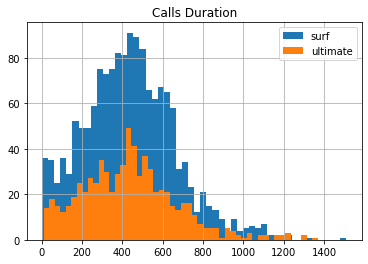

In [70]:
surf['calls_duration'].hist(bins=50, label = 'surf')
ultimate['calls_duration'].hist(bins=50, label = 'ultimate')
plt.title('Calls Duration')
plt.legend(loc='upper right')

O formato da distribuição das durações de chamadas por mês é parecido entre os planos.

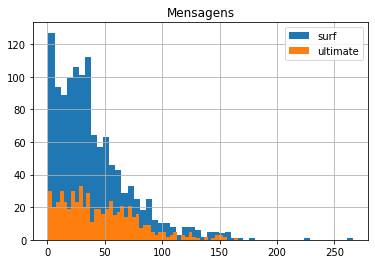

In [71]:
surf['messages'].hist(bins=50, label = 'surf')
ultimate['messages'].hist(bins=50, label = 'ultimate')
plt.title('Mensagens')
plt.legend(loc='upper right')

O formato da distribuição das mensagens por mês é parecido entre os planos. Entretanto a concentração em poucas mensagens por mes é maior na plano surf. Talvez por ele ser mais barato e dar direito a menos mensagens por mês. 

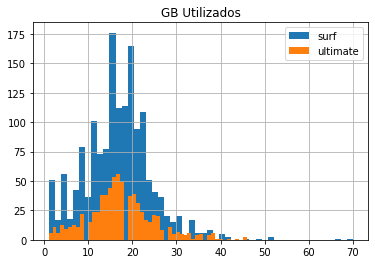

In [72]:
surf['gb_used'].hist(bins=50, label = 'surf')
ultimate['gb_used'].hist(bins=50, label = 'ultimate')
plt.title('GB Utilizados')
plt.legend(loc='upper right')

O formato da distribuição dos dados de internet por mês é parecido entre os planos. Abaixo podemos ver como a média, a mediana, os quartis, valores máximos e mínimos e desvio padrão mudam de acordo com o plano escolhido. Vale notar que apesar do preço mensal dos planos ser de 50, na média, levando em conta os gastos adicionais que o plano não cobre, os clientes de Surf e Ultimate geram na média, 60 e 72, respectivamente. Uma diferença bem menor.

In [73]:
surf.describe()

,user_id,month,Receita Mensal,calls_duration,messages,gb_used
count,1573.000000,1573.000000,1573.000000,1544.000000,1222.000000,1558.000000
mean,1242.755245,9.182454,60.706408,436.802461,40.109656,16.831194
std,139.227939,2.468199,55.388042,229.088544,33.035500,7.711922
min,1001.000000,1.000000,20.000000,2.000000,1.000000,1.000000
25%,1120.000000,8.000000,20.000000,279.000000,16.000000,12.000000
50%,1245.000000,10.000000,40.360000,430.000000,32.000000,17.000000
75%,1358.000000,11.000000,80.360000,579.000000,54.000000,21.000000
max,1499.000000,12.000000,590.370000,1510.000000,266.000000,70.000000


In [74]:
ultimate.describe()

,user_id,month,Receita Mensal,calls_duration,messages,gb_used
count,720.000000,720.000000,720.000000,712.000000,584.000000,719.000000
mean,1253.330556,9.151389,72.313889,435.286517,46.296233,17.331015
std,150.915644,2.558495,11.395108,237.459650,32.942118,7.648185
min,1000.000000,1.000000,70.000000,10.000000,1.000000,1.000000
25%,1126.000000,8.000000,70.000000,263.000000,21.000000,13.000000
50%,1241.500000,10.000000,70.000000,425.500000,41.000000,17.000000
75%,1401.000000,11.000000,70.000000,566.000000,66.000000,21.000000
max,1497.000000,12.000000,182.000000,1369.000000,166.000000,46.000000


In [75]:
resumo.describe()

,user_id,month,Receita Mensal,calls_duration,messages,gb_used
count,2293.000000,2293.000000,2293.000000,2256.000000,1806.000000,2277.000000
mean,1246.075883,9.172700,64.351147,436.324025,42.110188,16.989021
std,143.051927,2.496386,46.624945,231.711444,33.122931,7.693683
min,1000.000000,1.000000,20.000000,2.000000,1.000000,1.000000
25%,1122.000000,8.000000,23.480000,275.000000,17.000000,13.000000
50%,1245.000000,10.000000,70.000000,429.000000,34.000000,17.000000
75%,1368.000000,11.000000,70.000000,575.250000,59.000000,21.000000
max,1499.000000,12.000000,590.370000,1510.000000,266.000000,70.000000


In [76]:
surf['Receita Mensal'].sum()

95491.18

In [77]:
surf['Receita Mensal'].sum()/surf['Receita Mensal'].count()

60.706408137317226

In [78]:
ultimate['Receita Mensal'].sum()

52066.0

In [79]:
ultimate['Receita Mensal'].sum()/ultimate['Receita Mensal'].count()

72.31388888888888

In [80]:
variance_surf_calls = np.var(surf['calls_duration'])
variance_surf_calls

52447.570434357294

In [81]:
standard_deviation_calls = np.std(surf['calls_duration'])
standard_deviation_calls

229.01434547721524

In [82]:
mean_calls = surf['calls_duration'].mean()
mean_calls

436.80246113989637

In [83]:
variance_surf_messages = np.var(surf['messages'])
variance_surf_messages

1090.4511506183685

In [84]:
standard_deviation_messages = np.std(surf['messages'])
standard_deviation_messages

33.02197981070137

In [85]:
mean_messages = surf['messages'].mean()
mean_messages

40.10965630114566

In [86]:
variance_surf_gb_used = np.var(surf['gb_used'])
variance_surf_gb_used

59.43556096242673

In [87]:
standard_deviation_gb_used = np.std(surf['gb_used'])
standard_deviation_gb_used

7.709446216326223

In [88]:
mean_gb_used = surf['gb_used'].mean()
mean_gb_used

16.831193838254173

In [89]:
receita_mean_surf = surf['Receita Mensal'].mean()
receita_mean_surf

60.706408137317226

In [90]:
receita_mean_ultimate = ultimate['Receita Mensal'].mean()
receita_mean_ultimate

72.31388888888888

Teste de hipóteses 1: A receita média dos usuários dos planos Ultimate e Surf são diferentes. A hipótese H0 (nula) é de que as receitas médias são as mesmas, logo H1(alternativa) é que as médias são diferentes. Nível de significância escolhido foi de 5% (alpha = 0.05). 

In [91]:
alpha = 0.05

In [92]:
results = st.ttest_ind(surf['Receita Mensal'],ultimate['Receita Mensal'],equal_var = False)

In [93]:
results.pvalue

3.17039054811355e-15

In [94]:
if results.pvalue < alpha:  
    print("Nós rejeitamos a hipótese nula")
else:
    print("Nós não podemos rejeitar a hipótese nula")

Nós rejeitamos a hipótese nula


Rejeitamos a hipótese nula, com alpha 0.05, de que a receita média dos usuários dos planos Ultimate e Surf são as mesmas. Chegamos a essa conclusão pois após fazermos o teste t entre as amostras, o p-valor ficou abaixo do alpha. Logo a probabilidade da hipótese nula ser verdadeira é muito baixa. 

Agora vamos testar a hipotese 2: A receita média dos usuários da área de NY-NJ é diferente dos usuários de outras regiões. A hipótese H0 (nula) é de que as receitas médias são as mesmas, logo H1(alternativa) é que as médias são diferentes. Nível de significância escolhido foi de 5% (alpha = 0.05). 

In [95]:
users['city'].unique()

array(['Atlanta-Sandy Springs-Roswell, GA MSA',
       'Seattle-Tacoma-Bellevue, WA MSA',
       'Las Vegas-Henderson-Paradise, NV MSA', 'Tulsa, OK MSA',
       'Dallas-Fort Worth-Arlington, TX MSA',
       'San Francisco-Oakland-Berkeley, CA MSA',
       'Grand Rapids-Kentwood, MI MSA',
       'Orlando-Kissimmee-Sanford, FL MSA',
       'San Jose-Sunnyvale-Santa Clara, CA MSA',
       'Cleveland-Elyria, OH MSA',
       'Chicago-Naperville-Elgin, IL-IN-WI MSA', 'Knoxville, TN MSA',
       'New York-Newark-Jersey City, NY-NJ-PA MSA', 'Pittsburgh, PA MSA',
       'Fresno, CA MSA',
       'Washington-Arlington-Alexandria, DC-VA-MD-WV MSA',
       'Indianapolis-Carmel-Anderson, IN MSA', 'Jacksonville, FL MSA',
       'Los Angeles-Long Beach-Anaheim, CA MSA',
       'Omaha-Council Bluffs, NE-IA MSA',
       'Houston-The Woodlands-Sugar Land, TX MSA',
       'Philadelphia-Camden-Wilmington, PA-NJ-DE-MD MSA',
       'Tampa-St. Petersburg-Clearwater, FL MSA',
       'Birmingham-Hoover, AL MSA'

In [96]:
users.query('city in "New York-Newark-Jersey City, NY-NJ-PA MSA"')

,user_id,first_name,last_name,age,city,reg_date,plan,churn_date
14,1014,Edmundo,Simon,61,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-11-25,surf,2018-12-31
22,1022,Bo,Snow,73,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-20,surf,2018-09-07
24,1024,Yuki,Tyson,74,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-08-21,surf,2018-12-31
27,1027,Georgeanna,Cardenas,38,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-06-26,surf,2018-12-31
31,1031,Lane,Martin,52,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-07-15,ultimate,2018-12-31
...,...,...,...,...,...,...,...,...
469,1469,Rory,Nixon,75,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-06-04,surf,2018-12-31
482,1482,Armand,Glenn,70,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-01-01,ultimate,2018-12-31
494,1494,Preston,Downs,70,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-04-19,surf,2018-12-31
495,1495,Fidel,Sharpe,67,"New York-Newark-Jersey City, NY-NJ-PA MSA",2018-09-04,surf,2018-12-31


Filtrei somente os usuários da área de NY-NJ em uma tabela. Na outra os usuários que não fazem parte dessa área. 

In [97]:
users_NYNJ = resumo.query('city in "New York-Newark-Jersey City, NY-NJ-PA MSA"')
users_NYNJ

,user_id,month,plan,city,Receita Mensal,calls_duration,messages,gb_used
56,1014,11,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA",20.00,163.0,9.0,2.0
57,1014,12,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA",38.84,1114.0,64.0,8.0
75,1022,5,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA",20.00,302.0,NaN,5.0
76,1022,6,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA",100.00,490.0,NaN,23.0
77,1022,7,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA",20.00,475.0,NaN,10.0
...,...,...,...,...,...,...,...,...
2284,1498,8,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA",70.00,266.0,NaN,20.0
2285,1498,9,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA",100.00,363.0,NaN,23.0
2286,1498,10,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA",80.00,298.0,NaN,21.0
2287,1498,11,surf,"New York-Newark-Jersey City, NY-NJ-PA MSA",60.00,223.0,NaN,19.0


In [98]:
users_NYNJ.describe()

,user_id,month,Receita Mensal,calls_duration,messages,gb_used
count,377.000000,377.000000,377.000000,370.000000,285.000000,376.000000
mean,1211.679045,9.082228,59.921353,438.394595,35.329825,16.938830
std,142.125564,2.490648,43.537865,202.493055,26.789279,7.306179
min,1014.000000,2.000000,20.000000,7.000000,1.000000,1.000000
25%,1099.000000,7.000000,20.000000,302.000000,13.000000,12.750000
50%,1176.000000,10.000000,51.770000,452.000000,31.000000,17.000000
75%,1300.000000,11.000000,72.460000,571.750000,49.000000,21.000000
max,1498.000000,12.000000,280.000000,1167.000000,126.000000,41.000000


In [99]:
users_not_NYNJ = resumo.query('city not in "New York-Newark-Jersey City, NY-NJ-PA MSA"')
users_not_NYNJ

,user_id,month,plan,city,Receita Mensal,calls_duration,messages,gb_used
0,1000,12,ultimate,"Atlanta-Sandy Springs-Roswell, GA MSA",70.00,124.0,11.0,2.0
1,1001,8,surf,"Seattle-Tacoma-Bellevue, WA MSA",20.00,182.0,30.0,7.0
2,1001,9,surf,"Seattle-Tacoma-Bellevue, WA MSA",20.00,315.0,44.0,14.0
3,1001,10,surf,"Seattle-Tacoma-Bellevue, WA MSA",90.09,393.0,53.0,22.0
4,1001,11,surf,"Seattle-Tacoma-Bellevue, WA MSA",60.00,426.0,36.0,19.0
...,...,...,...,...,...,...,...,...
2277,1497,12,ultimate,"Los Angeles-Long Beach-Anaheim, CA MSA",70.00,300.0,50.0,11.0
2289,1499,9,surf,"Orlando-Kissimmee-Sanford, FL MSA",20.00,346.0,NaN,13.0
2290,1499,10,surf,"Orlando-Kissimmee-Sanford, FL MSA",70.00,385.0,NaN,20.0
2291,1499,11,surf,"Orlando-Kissimmee-Sanford, FL MSA",40.00,308.0,NaN,17.0


In [100]:
users_not_NYNJ.describe()

,user_id,month,Receita Mensal,calls_duration,messages,gb_used
count,1916.000000,1916.000000,1916.000000,1886.000000,1521.000000,1901.000000
mean,1252.843946,9.190501,65.222771,435.917815,43.380671,16.998948
std,142.294264,2.497776,47.170414,237.067876,34.036963,7.769847
min,1000.000000,1.000000,20.000000,2.000000,1.000000,1.000000
25%,1132.000000,8.000000,24.927500,272.000000,18.000000,13.000000
50%,1253.500000,10.000000,70.000000,424.000000,35.000000,17.000000
75%,1374.000000,11.000000,70.000000,576.000000,61.000000,21.000000
max,1499.000000,12.000000,590.370000,1510.000000,266.000000,70.000000


teste hipotese 2

In [101]:
results2 = st.ttest_ind(users_NYNJ['Receita Mensal'],users_not_NYNJ['Receita Mensal'],equal_var = False)

In [102]:
results2.pvalue

0.03352561588530014

In [103]:
if results.pvalue < alpha:  
    print("Nós rejeitamos a hipótese nula")
else:
    print("Nós não podemos rejeitar a hipótese nula")

Nós rejeitamos a hipótese nula


Rejeitamos a hipótese nula, com alpha 0.05, de que a receita média dos usuários da área de NY-NJ são as mesmas. Chegamos a essa conclusão pois após fazermos o teste t entre as amostras, o p-valor ficou abaixo do alpha. Logo a probabilidade da hipótese nula ser verdadeira é muito baixa. 